The number of pounds of steam used per month at a plant is thought to be related to the average monthly ambient temperature. The past year’s usages and temperatures follow.

In [19]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/212Table.csv")
display(dataset)

# Shape of our dataset
display(dataset.shape)

# Info on our dataset
display(dataset.info())

# Describe our dataset
display(dataset.describe())

,Month,Temperature,Usage/l000
0,Jan.,21,185.79
1,Jul.,68,621.55
2,Feb.,24,214.47
3,Aug.,74,675.06
4,Mar.,32,288.03
5,Sep.,62,562.03
6,Apr.,47,424.84
7,Oct.,50,452.93
8,May,50,454.68
9,Nov.,41,369.95


(12, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        12 non-null     object 
 1   Temperature  12 non-null     int64  
 2   Usage/l000   12 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 416.0+ bytes


None

,Temperature,Usage/l000
count,12.000000,12.000000
mean,46.500000,421.861667
std,17.344111,159.723460
min,21.000000,185.790000
25%,31.500000,284.517500
50%,48.500000,438.885000
75%,59.750000,544.780000
max,74.000000,675.060000


Generate a scatterplot of the data.

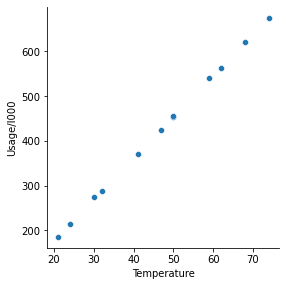

In [8]:
# Generate a scatterplot of the data.
import numpy as np
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/212Table.csv")

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(dataset, x_vars=['Temperature'], 
             y_vars='Usage/l000', height=4, aspect=1, kind='scatter')
plt.show()

Fit a simple linear regression model to the data and generate the intercept and coefficient estimates.  

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/212Table.csv")

# Creating X and y
X = dataset['Temperature']
y = dataset['Usage/l000']

# Add a list of ones with length of X to identify intercept terms in linear model
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
 
results.summary()

C:\JupyterLab\resources\jlab_server\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Usage/l000   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.412e+04
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.10e-20
Time:                        13:04:50   Log-Likelihood:                -23.920
No. Observations:                  12   AIC:                             51.84
Df Residuals:                      10   BIC:                             52.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.3321      1.670     -3.792      0.004     -10.053      -2.611
Temperature     9.2085      0.034    272.255      0.000       9.133       9.284
==============================================================================
Omnibus:                        2.719   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                1.292
Skew:                           0.804   Prob(JB):                        0.524
Kurtosis:                       2.972   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calculate the Sum of Squares Total (SST), the Sum of Squares of the Response (SSR), and the Sum of Squares of the Error/Residuals (SSE), and use them to find the coefficient of determination, R^2.

In [31]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/forestwhite/Regression/main/data/212Table.csv")

import matplotlib.pyplot as plt 

# Creating X and y
X = dataset['Temperature']
y = dataset['Usage/l000']



# calculate y_hat estimate and sample average for y
yhat = 9.2085*X - 6.3321
ybar = np.average(y)
print("ybar: ")
display(ybar)

#Calculate the sum of squares values
SS_total=sum(np.square(np.subtract(y,ybar)))
print("SS_total: ")
display(SS_total)
SS_error=sum(np.square(np.subtract(y,yhat)))
print("SS_error: ")
display(SS_error)
SS_regression=sum(np.square(np.subtract(yhat,ybar)))
print("SS_regression: ")
display(SS_regression)

# calculate coefficient of determination, R^2
r_squared=SS_regression/SS_total
print("r_squared: ")
display(r_squared)


ybar: 


421.8616666666667

SS_total: 


280627.4199666666

SS_error: 


37.85472832000013

SS_regression: 


280591.52670165343

r_squared: 


0.9998720963724164

Plot the linear fit line.

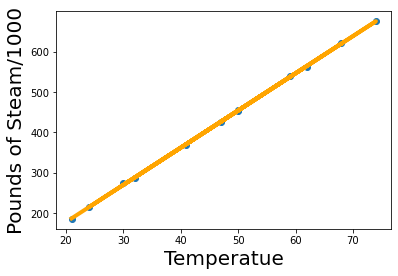

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating X and y
X = dataset['Temperature']
y = dataset['Usage/l000']

plt.scatter(X,y)
 
yhat = 9.2085*X - 6.3321
fig = plt.plot(X, yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Temperature', fontsize = 20)
plt.ylabel('Pounds of Steam/1000', fontsize = 20)
plt.show()